In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine, func

In [20]:

# Create engine to connect to the SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

# Create our session (link) from Python to the DB
session = sessionmaker(bind=engine)()


In [10]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


# Exploratory Precipitation Analysis

In [11]:

# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date


'2017-08-23'

<Figure size 864x864 with 0 Axes>

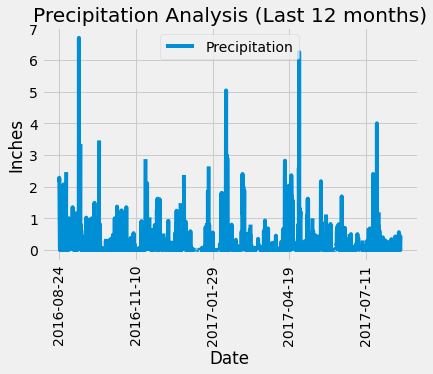

In [12]:

# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date one year from the last date in data set
most_recent_date = session.query(func.max(Measurement.date)).scalar()
one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
precipitation_data = session.query(*sel).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])
precip_df.set_index('Date', inplace=True)

# Sort the dataframe by date
precip_df.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(12, 12))
precip_df.plot(rot=90)
plt.title("Precipitation Analysis (Last 12 months)")
plt.ylabel("Inches")
plt.show()




In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
total_stations

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [Measurement.station, func.count(Measurement.station)]
active_stations = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
station_stats = session.query(*sel).filter(Measurement.station == most_active_station).all()
station_stats

[(54.0, 85.0, 71.66378066378067)]

<Figure size 720x432 with 0 Axes>

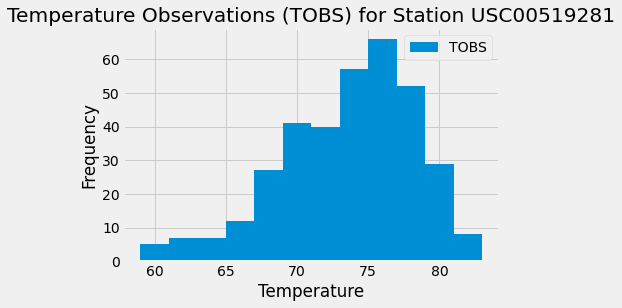

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.tobs).    filter(Measurement.station == most_active_station).    filter(Measurement.date >= one_year_ago).all()
tobs_df = pd.DataFrame(tobs_data, columns=['TOBS'])
plt.figure(figsize=(10, 6))
tobs_df.plot(kind='hist', bins=12)
plt.title(f"Temperature Observations (TOBS) for Station {most_active_station}")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [18]:
# Close Session
session.close()